In [1]:
import splat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from astropy.visualization import ZScaleInterval
import matplotlib
import wisps
import wisps.simulations as wispsim
import seaborn as sns
import matplotlib.colors as mcolors

from astropy.coordinates import SkyCoord
import astropy.coordinates as astrocoord
import astropy.units as u

import matplotlib as mpl
mpl.rcParams['font.size'] = 18
%matplotlib inline

In [2]:
#MIX MY COLORMAP WITH COOOLWARM 
colors1 = plt.cm.coolwarm(np.linspace(0., 1, 256))
colors2=plt.cm.YlOrBr(np.linspace(0., 1, 256))
colors = np.vstack((colors1+colors1)/2)
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [3]:
mymap_r=mymap.reversed(name='revers')

In [4]:
def get_indices(x):
    if x is None :
        return pd.Series({})
    else:
        return  pd.Series(x.indices)
    
def get_spt(x):
    if x is None:
        return np.nan
    else:
        return x.spectral_type[0]

In [5]:
#read in the data
cands0=pd.read_hdf(wisps.LIBRARIES+'/objects_of_interest.hdf', key='all')

In [6]:
cands=cands0.spectra.apply(get_indices)
cands['spectra']=cands0.spectra

In [7]:
cands['grism_id']=cands0.grism_id
cands['spt']=cands0.spectra.apply(get_spt)

In [8]:
canddf=cands[~cands.spectra.isna()].reset_index(drop=True)

In [9]:
canddf['spt']=canddf.spectra.apply(lambda x: x.spectral_type[0])
canddf['spt_er']=canddf.spectra.apply(lambda x: x.spectral_type[1])
canddf['distance']=canddf.spectra.apply(lambda x: x.distance['val'].value)
canddf['distance_er']=canddf.spectra.apply(lambda x: x.distance['er'].value)
canddf['coord']=canddf.spectra.apply(lambda x:x.coords)

In [10]:
canddfj=canddf.join(canddf.spectra.apply(lambda x: pd.Series(x.mags)))

In [11]:
ucds=wisps.Annotator.reformat_table((canddfj[canddfj.spt>=17]).reset_index(drop=True)).sort_values(by='spt')

In [12]:
#remove some objects by name
ucds=(ucds[~ ucds.grism_id.isin(['par199-00124'])]).reset_index(drop=True).sort_values(by='spt')

In [13]:
coords=SkyCoord(ucds.coord.values)

In [14]:
galoc=coords.transform_to(astrocoord.Galactocentric(galcen_distance=8.3*u.kpc))

In [15]:
#Rsun=8300.
#Zsun=27.
#r=np.sqrt( (coords.distance.value * np.cos( coords.galactic.b.radian ) )**2 + Rsun * (Rsun - 2 * coords.distance.value * np.cos( coords.galactic.b.radian ) * np.cos( coords.galactic.l.radian ) ) )
#z=Zsun+ coords.distance.value * np.sin( coords.galactic.b.radian - np.arctan( Zsun / Rsun) )
x, y, z=galoc.cartesian.xyz
r=(x**2+y**2)**0.5

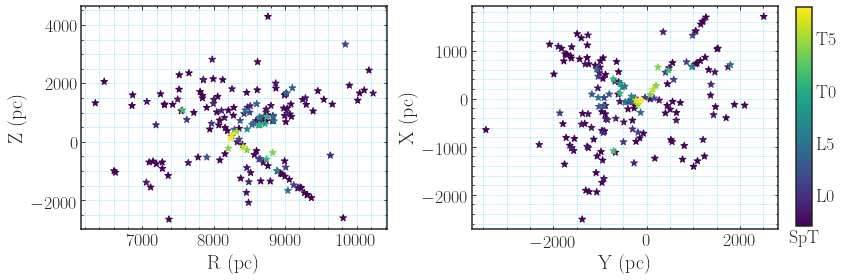

In [23]:
fig, (ax, ax1)=plt.subplots(figsize=(11, 4), ncols=2)
sc=ax.scatter(r, z, c=ucds.spt.values, s=50, cmap='viridis',  marker='*')

ax.minorticks_on()

sc=ax1.scatter(coords.cartesian.x.value, coords.cartesian.y.value, 
               c=ucds.spt.values, s=50, cmap='viridis', marker='*')


ax.minorticks_on()



ax.set_ylabel('Z (pc)', fontsize=20)
ax.set_xlabel('R (pc)', fontsize=20)
ax1.set_ylabel('X (pc)', fontsize=20)
ax1.set_xlabel('Y (pc)', fontsize=20)

ax.minorticks_on()
ax1.minorticks_on()

cax = fig.add_axes([1.01, 0.2, .02, .76])
cbar=plt.colorbar(sc, cax=cax, orientation='vertical')
cbar.ax.set_xlabel(r'SpT ', fontsize=18)
ax.grid(which='both', color='#7FDBFF')
ax1.grid(which='both', color='#7FDBFF')

cbar.set_ticks([20, 25, 30, 35, 40])
cbar.set_ticklabels(['L0', 'L5', 'T0', 'T5', 'Y0'])

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/candidate_distances.pdf', bbox_inches='tight')

In [17]:
ucds['pointing']=ucds.grism_id.apply(wispsim.get_proper_pointing)

In [18]:
pntcoords=SkyCoord([x.coord for x in wisps.OBSERVED_POINTINGS 
                    if not (x.name.lower() in ucds.pointing.str.lower().values)])

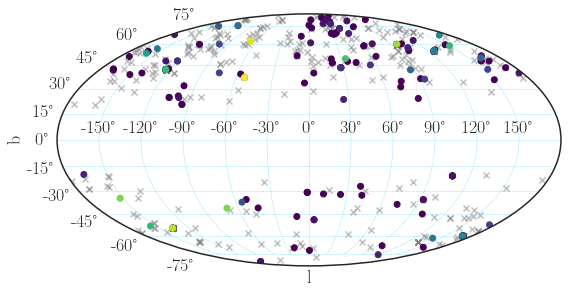

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='mollweide')

ax.scatter(pntcoords.galactic.l.wrap_at(180*u.deg).radian, pntcoords.galactic.b.wrap_at(180*u.deg).radian, c='grey', marker='x', alpha=0.5)
c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian, galoc.galactic.b.wrap_at(180*u.deg).radian,
           c=np.vstack(ucds.spt.values)[:,0], cmap='viridis')


plt.xlabel("l", fontsize=18)
plt.ylabel("b", fontsize=18)
plt.grid(color='#7FDBFF')
plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/candidate_skymap.pdf', bbox_inches='tight')

In [20]:
hgjkkl

NameError: name 'hgjkkl' is not defined

In [ ]:
abs_mag_relation_140=wisps.POLYNOMIAL_RELATIONS['sp_F140W']
abs_mag_relation_110=wisps.POLYNOMIAL_RELATIONS['sp_F110W']
abs_mag_relation_160=wisps.POLYNOMIAL_RELATIONS['sp_F160W']

In [ ]:
dhgjk=fdf.sort_values(by='distance')[['grism_id', 'distance', 'spt']]

In [ ]:
latc_df=pd.DataFrame()

In [ ]:
latc_df['Shortname']=fdf.spectra.apply(lambda x: x.shortname.upper())
latc_df['designation']=fdf.spectra.apply(lambda x: x.designation.upper())
latc_df['grism id']=fdf.spectra.apply(lambda x: x.name.upper())
latc_df['snrj']=fdf.spectra.apply(lambda x: int(round(x.snr['snr1'])))
latc_df['spt']=fdf.spectra.apply(lambda x: splat.typeToNum(x.spectral_type[0]) +r'$\pm$'+ str(x.spectral_type[1]))
latc_df['ra']=fdf.spectra.apply(lambda x: x.ra.value)
latc_df['dec']=fdf.spectra.apply(lambda x: x.dec.value)
latc_df['f110']=fdf.spectra.apply(lambda x:  str(round(x.mags['F110W'][0],3)) +r'$\pm$'+ str(round(x.mags['F110W'][1],3)))
#latc_df['f110_er']=fdf.spectra.apply(lambda x: round(x.mags['F110W'][1], 1))
latc_df['f140']=fdf.spectra.apply(lambda x:  str(round(x.mags['F140W'][0],3)) +r'$\pm$'+  str(round(x.mags['F140W'][1],3)))
#latc_df['f140_er']=fdf.spectra.apply(lambda x: round(x.mags['F140W'][1], 1))
latc_df['f160']=fdf.spectra.apply(lambda x:   str(round(x.mags['F160W'][0],3)) + r'$\pm$'+ str(round(x.mags['F160W'][1],3)))
#latc_df['f160_er']=fdf.spectra.apply(lambda x: round(x.mags['F160W'][1], 1))
latc_df['distance']=fdf.spectra.apply(lambda x: str(int(round(x.distance['val'].value, 0)))  + r'$\pm$'+ 
                                                 str((int(round(x.distance['er'].value, 0)))))

In [ ]:
latc_df=latc_df.replace('nan$\\pm$nan', 'nodata')

In [ ]:
#get the right sequence of coplumns

col_list=['designation','grism id', 'ra', 'dec', 'f110', 'f140', 'f160', 'snrj', 'spt', 'distance']

In [ ]:
latc_df[col_list]

In [ ]:
latc_df[col_list].to_latex(wisps.LIBRARIES+'/candidates.tex',
             header=True, index=False, na_rep=' ')

In [ ]:
for k in (fdf.spectra.iloc[0]).mags.keys():
    fdf[k]=fdf.spectra.apply(lambda x: x.mags[k])
    
for k in (fdf.spectra.iloc[0]).indices.keys():
    fdf[k]=fdf.spectra.apply(lambda x: x.indices[k])
    

In [ ]:
#%%capture
fold='/Users/caganze/research/wisps/figures/ltwarfs/'

ids=0
for idx, row in fdf.iterrows():
    try:
        s=row.spectra
        print (s)
        filename=fold+'spectrum'+str(ids)+'.jpeg'
        s.plot(save=True, filename=filename)
        ids=ids+1
    except:
        s=wisps.Source(filename=row.grism_id.replace('g141', 'G141'),is_ucd=False )
        print (s)
        filename=fold+'spectrum'+str(ids)+'.jpeg'
        s.plot(save=True, filename=filename)
        ids=ids+1


In [ ]:
sk=SkyCoord(ra=fdf.RA.values*u.deg, dec=fdf.DEC.values*u.deg, distance=fdf.distance.values*u.pc)

In [ ]:
norm = matplotlib.colors.Normalize(vmin=20., vmax=37.0)

In [ ]:
from matplotlib import cm

In [ ]:
import wisps.simulations as wispsim

In [ ]:
def plot_vals(values, ax, title):
    values=wisps.drop_nan(np.sort(values))
    kernel = stats.gaussian_kde(values)
    height = kernel.pdf(values)
    mode_value = values[np.argmax(height)]
    h=ax.hist(values, bins='auto', normed=True, histtype='step')
    ax.plot(values, height)
    ax.axvline(mode_value, c='k')
    ax.set_xlabel(title, fontsize=18)

In [ ]:
#fig, ax=plt.subplots(ncols=3,figsize=(12, 4))
#plot_vals((wisps.OBSERVED_POINTINGS[np.random.randint(533)]).mags['F110'], ax[0], 'F110W')
#plot_vals((wisps.OBSERVED_POINTINGS[np.random.randint(533)]).mags['F140'], ax[1], 'F140W')
#plot_vals((wisps.OBSERVED_POINTINGS[np.random.randint(533)]).mags['F160'], ax[2], 'F160W')
#plt.tight_layout()
#plt.savefig(wisps.OUTPUT_FIGURES+'/mag_limits_illustration.pdf', bbox_inches='tight')

In [ ]:
df['designation']=df.spectra.apply(lambda x: x.designation)

In [ ]:
df.shape

In [ ]:
df.to_pickle(wisps.OUTPUT_FILES+'/true_spectra_cands.pkl')

In [ ]:
dfn=df[df.spt>=17]

In [ ]:
import seaborn as sns

In [ ]:
fig, ax=plt.subplots()

sns.distplot(fdf.spt,  ax=ax, hist_kws={'log': True},  norm_hist=False, kde=False)
#h=ax.hist(dfn.spt, log=True, bins=38-17)
#dfn['spt'].plot(kind='hist')

ax.set_xticks([17, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])

ax.set_xlabel('Spectral Type', fontsize=18)
ax.set_ylabel('Number', fontsize=18)

plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/sptdistribution.pdf')

In [ ]:
fig, ax=plt.subplots()

sns.distplot(fdf.distance.apply(np.log10),  ax=ax, hist_kws={'log': True}, norm_hist=False, kde=False)
#h=ax.hist(dfn.spt, log=True, bins=38-17)
#dfn['spt'].plot(kind='hist')

#ax.set_xticks([17, 20, 25, 30, 35, 40])
#ax.set_xticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])

ax.set_xlabel('Log Distance (pc)', fontsize=18)
ax.set_ylabel('Number', fontsize=18)

plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/distdistribution.pdf')

In [ ]:
s=fdf.spectra.iloc[-1]

In [ ]:
%%capture 
res=splat.classifyByTemplate(s.splat_spectrum, range=[[1.15, 1.65]], spt=[34,38], force=True )

In [ ]:
fghvjjk

#########################

In [24]:
spdwarf=splat.searchLibrary(binary=False, giant=False, ucd=True)
spdwarf.shortname=spdwarf.DESIGNATION.apply(splat.designationToShortName)
spdwarf=spdwarf[~(spdwarf.shortname.isin(wisps.FORBIDDEN_LIST) )]
#spdwarf=spdwarf[~spdwarf.]
spdwarf.SPEX_TYPE=spdwarf.SPEX_TYPE.apply(wisps.make_spt_number)

In [25]:
def format_jk_zhang(row):
    jmag=np.nan
    hmag=np.nan
    jmag_er=np.nan
    hmag_er=np.nan
    if row['J'] !='none':
        #print ((row['J']).split('±'))
        #row['J_mag']=(row['J']).split('±')[0]
        #row['J_er']=(row['J']).split('±')[-1]
        jmag=(row['J']).split('±')[0]
        jmag_er=(row['J']).split('±')[1]
        
    if row['H'] !='none':
        #print ((row['H']).split('±'))
        #row['H_mag']=(row['H']).split('±')[0]
        #row['H_er']=(row['H']).split('±')[-1]
        hmag=(row['H']).split('±')[0]
        hmag_er=(row['H']).split('±')[1]
        
    spt=splat.typeToNum(row[' SpT'])
        
    return pd.Series({'H':jmag, 'J':hmag, 'H_er':hmag_er, 'J_er':jmag_er, 'SpTn':spt})

def format_jk_manj(row):
    jmag=np.nan
    hmag=np.nan
    jmag_er=np.nan
    hmag_er=np.nan
    if str(row['J (mag)']) !='nan':
        #ignore others
        if not str(row['J (mag)']).startswith('>'):
            jmag=((row['J (mag)']).split('+or-')[0]).strip()
            jmag_er=((row['J (mag)']).split('+or-')[1]).strip()

    if str(row['H (mag)']) !='nan':
        if not str(row['J (mag)']).startswith('>'):
            hmag=(row['H (mag)']).split('+or-')[0]
            hmag_er=(row['H (mag)']).split('+or-')[1]
        
    spt=splat.typeToNum(row['SpT'])
        
    return pd.Series({'H':jmag, 'J':hmag, 'H_er':hmag_er, 'J_er':jmag_er, 'SpTn':spt})

In [26]:
fdf=ucds
pols=wisps.POLYNOMIAL_RELATIONS
color_pol=pols['colors']

In [27]:
#zhang
zhng=pd.read_csv('~/research/wisps/data/zhang_data.csv')
zhng_clrs=zhng.apply(format_jk_zhang, axis=1 ).applymap(float)

In [28]:
#manjavacas
man_df0=pd.read_csv('/users/caganze/research/wisps/data/manjavaca_phot.txt', sep='\t',  index_col=None)
man_clrs=man_df0.apply(format_jk_manj, axis=1 ).applymap(float)

In [29]:
man_clrs.columns

Index(['H', 'J', 'H_er', 'J_er', 'SpTn'], dtype='object')

In [30]:
fdf['J']=fdf['F140W']+color_pol['j_f140'][0](fdf['spt'])
fdf['J_er']=(fdf['F140W_er']**2+color_pol['j_f140'][1]**2)**0.5

fdf['H']=fdf['F160W']+color_pol['h_f160'][0](fdf['spt'])
fdf['H_er']=(fdf['F160W_er']**2+color_pol['h_f160'][1]**2)**0.5

In [31]:
fdf['J_110']=fdf['F110W']+color_pol['j_f110'][0](fdf['spt'])
fdf['J_110_er']=(fdf['F110W_er']**2+color_pol['j_f110'][1]**2)**0.5

In [32]:
ucd_wisp=fdf[fdf.grism_id.str.startswith('par')]
ucd_hst3d=fdf[~fdf.grism_id.str.startswith('par')]

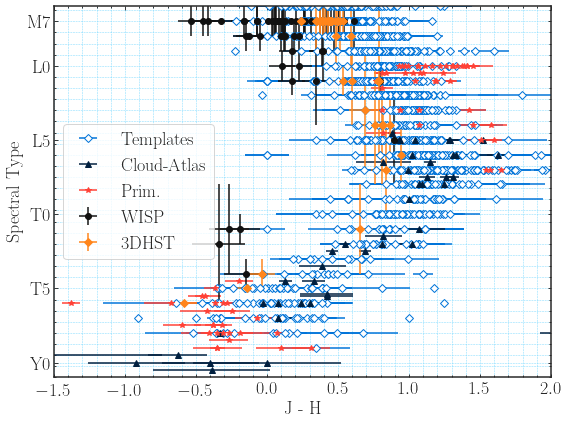

In [33]:
fig, ax=plt.subplots(figsize=(8, 6))



ax.errorbar(spdwarf['J_2MASS']-spdwarf['H_2MASS'], spdwarf.SPEX_TYPE, fmt='D', 
            xerr=(spdwarf.J_2MASS_E**2+spdwarf.H_2MASS_E**2)**0.5, color='#0074D9', 
            mfc='white',  label='Templates')

#ax.errorbar(spsubdwarf['J_2MASS']-spsubdwarf['H_2MASS'],spsubdwarf.SPEX_TYPE, fmt='D', 
#            xerr=(spsubdwarf.J_2MASS_E**2+spsubdwarf.H_2MASS_E**2)**0.5, color='#2ECC40', mfc='white', label='Spex Subdwarfs')

ax.errorbar(-man_clrs['J']+man_clrs['H'], man_clrs['SpTn'], fmt='^', 
            xerr=(man_clrs['J_er']**2+man_clrs['H_er']**2)**0.5, color='#001f3f', label='Cloud-Atlas')

ax.errorbar(-zhng_clrs['J']+zhng_clrs['H'],zhng_clrs.SpTn, fmt='*', 
            xerr=(zhng_clrs.J_er**2+zhng_clrs.H_er**2)**0.5, color='#FF4136', label='Prim.')



ax.errorbar(ucd_wisp['J_110']-ucd_wisp['H'], ucd_wisp['spt'], fmt='o', 
            xerr=(ucd_wisp['J_110_er']**2+ucd_wisp['H_er']**2)**0.5, 
            yerr=ucd_wisp['spt_er'], color='#111111', label=r'WISP')

ax.errorbar(ucd_hst3d['J']-ucd_hst3d['H'], ucd_hst3d['spt'], fmt='D',
            xerr=(ucd_hst3d['J_er']**2+ucd_hst3d['H_er']**2)**0.5, 
            yerr=ucd_hst3d['spt_er'], color='#FF851B', label=r'3DHST')


ax.set_ylim([16, 41])
ax.set_xlim([-1.5, 2])
ax.invert_yaxis()


ax.set_yticks([17, 20, 25, 30, 35, 40])
ax.set_yticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])


ax.minorticks_on()
ax.set_ylabel('Spectral Type', fontsize=18)
ax.set_xlabel(r'J - H', fontsize=18)

ax.legend(fontsize=18)

plt.grid(which='both', color='#7FDBFF')
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/color_color_plots.pdf', bbox_inches='tight')


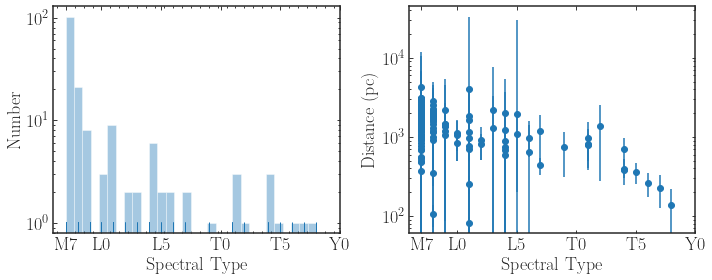

In [38]:
fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(10, 4))
sns.distplot(ucds.spt, kde=False, ax=ax, rug=True)
ax.set_yscale('log')
plt.tight_layout()
ax.set_xlabel('Spectral Type', fontsize=18)
ax.set_ylabel('Number', fontsize=18)
ax.minorticks_on()

ax1.errorbar(ucds.spt,  ucds.distance, yerr=ucds.distance_er , fmt='o')
ax1.set_yscale('log')
ax1.set_ylabel('Distance (pc)', fontsize=18)
ax1.set_xlabel('Spectral Type', fontsize=18)

for a in [ax, ax1]:
    a.set_xticks([17, 20, 25, 30, 35, 40])
    a.set_xticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/sptdistribution.pdf')

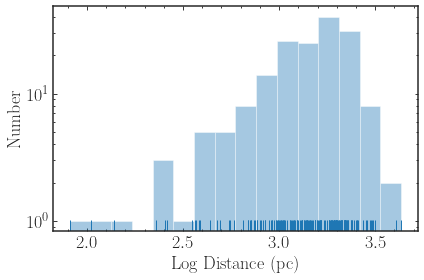

In [39]:
fig,ax=plt.subplots()
sns.distplot(ucds.distance.apply(np.log10), kde=False, ax=ax, rug=True)
ax.set_yscale('log')
plt.tight_layout()
ax.set_xlabel('Log Distance (pc)', fontsize=18)
ax.set_ylabel('Number', fontsize=18)
ax.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/distdistribution.pdf')

In [36]:
import itertools
df=[]
for i, j in itertools.product(['saumon2008', 'baraffe2003', 'marley2019', 'phillips2020'], wispsim.HS):
    df.append([pd.read_hdf(wisps.OUTPUT_FILES+'/final_simulated_sample.hdf', key=str(i)+str('h')+str(j))])

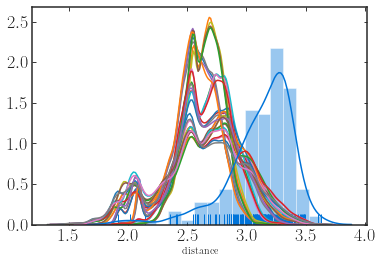

In [37]:
for d in df:
    sns.kdeplot(d[0].dist.apply(np.log10), legend=False)
sns.distplot(ucds.distance.apply(np.log10), kde=True, color='#0074D9', rug=True)